In [2]:
pip install yahooquery



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "/Users/mrwin/anan/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "/Users/mrwin/anan/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "/Users/mrwin/anan/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/Users/mrwin/anan/anaconda3/lib/python3.9/site-packages/pip/_internal/commands/install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "/Users/mrwin/anan/anaconda3/lib/python3.9/site-packages/pip/_internal/metadata/pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File


Data download successful.
Downloaded data contains 756 rows.

First few rows of the dataset:

  symbol        date       open       high        low      close     volume  \
0   AAPL  2020-01-02  74.059998  75.150002  73.797501  75.087502  135480400   
1   AAPL  2020-01-03  74.287498  75.144997  74.125000  74.357498  146322800   
2   AAPL  2020-01-06  73.447502  74.989998  73.187500  74.949997  118387200   
3   AAPL  2020-01-07  74.959999  75.224998  74.370003  74.597504  108872000   
4   AAPL  2020-01-08  74.290001  76.110001  74.290001  75.797501  132079200   

    adjclose  dividends  splits  
0  72.796021        0.0     0.0  
1  72.088303        0.0     0.0  
2  72.662720        0.0     0.0  
3  72.320953        0.0     0.0  
4  73.484352        0.0     0.0  

Summary of the dataset:

             open        high         low       close        volume  \
count  756.000000  756.000000  756.000000  756.000000  7.560000e+02   
mean   130.231998  131.892775  128.614983  130.311812  1.1

/Users/mrwin/anan/anaconda3/lib/python3.9/site-packages/yahooquery/utils/__init__.py:1470: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  has_live_indice = index_utc[-1] >= last_trade - pd.Timedelta(2, "S")
/Users/mrwin/anan/anaconda3/lib/python3.9/site-packages/yahooquery/ticker.py:1333: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["dividends"].fillna(0, inplace=True)
/Users/mrwin/anan/anaconda3/lib/python3.9/site-packages/yahooquery/ticker.py:1335: FutureWarning

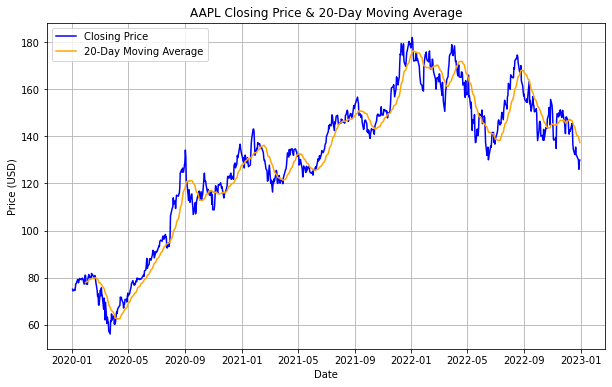

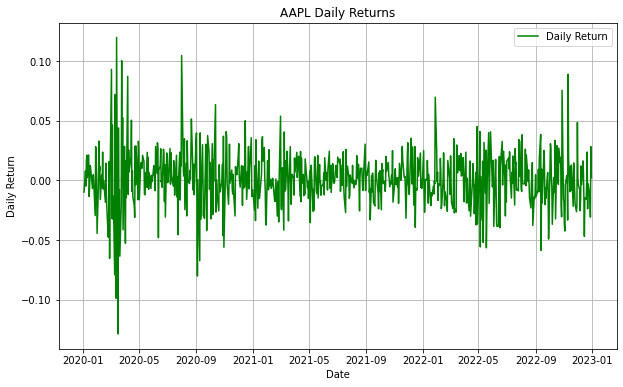


Saving processed data to CSV...

Data wrangling completed. Processed data saved to 'outputs/processed_yahoo_finance_data.csv'.



In [4]:
# Yahoo Finance API Mini-Project with yahooquery

import pandas as pd
import matplotlib.pyplot as plt
import os
import time
from yahooquery import Ticker

# 1. Data Collection

ticker_symbol = 'AAPL'
print(f"Downloading data for ticker: {ticker_symbol}...\n")

attempts = 3
stock_data = None
for attempt in range(attempts):
    try:
        ticker = Ticker(ticker_symbol)
        stock_data = ticker.history(start='2020-01-01', end='2023-01-01')
        if stock_data.empty:
            raise ValueError("No data found. Please check the ticker symbol or the date range.")
        else:
            # Reset the index to have a simple date index
            stock_data = stock_data.reset_index()
            stock_data = stock_data[stock_data['symbol'] == ticker_symbol]
            print("Data download successful.")
            print(f"Downloaded data contains {len(stock_data)} rows.\n")
            break
    except Exception as e:
        print(f"Attempt {attempt + 1} failed: {e}")
        if attempt < attempts - 1:
            print("Retrying download...\n")
            time.sleep(5)  # Wait for 5 seconds before retrying
        else:
            print("All attempts to download data failed.\n")
            stock_data = None

# Proceed only if data was downloaded successfully
if stock_data is not None:
    # Inspect the first few rows of the data
    print("First few rows of the dataset:\n")
    print(stock_data.head())
    print("\nSummary of the dataset:\n")
    print(stock_data.describe())

    # 2. Data Wrangling

    # Check for missing values
    print("\nChecking for missing values in the dataset...\n")
    missing_values = stock_data.isnull().sum()
    print(missing_values)

    # Fill any missing values with forward fill method
    if missing_values.any():
        print("\nFilling missing values with forward fill method...\n")
        stock_data.fillna(method='ffill', inplace=True)
        print("Missing values filled.\n")
    else:
        print("No missing values found.\n")

    # Add a new column for the 20-day moving average
    print("Calculating 20-Day Moving Average...\n")
    stock_data['20-Day MA'] = stock_data['close'].rolling(window=20).mean()

    # Calculate the daily returns
    print("Calculating daily returns...\n")
    stock_data['Daily Return'] = stock_data['close'].pct_change()

    # Inspect the dataset after wrangling
    print("Data after adding 20-Day Moving Average and Daily Return columns:\n")
    print(stock_data.head())

    # 3. Data Visualization

    print("\nGenerating plots...\n")
    try:
        # Plot the closing price and 20-day moving average
        plt.figure(figsize=(10, 6))
        plt.plot(stock_data['date'], stock_data['close'], label='Closing Price', color='blue')
        plt.plot(stock_data['date'], stock_data['20-Day MA'], label='20-Day Moving Average', color='orange')
        plt.title(f'{ticker_symbol} Closing Price & 20-Day Moving Average')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Plot daily returns
        plt.figure(figsize=(10, 6))
        plt.plot(stock_data['date'], stock_data['Daily Return'], label='Daily Return', color='green')
        plt.title(f'{ticker_symbol} Daily Returns')
        plt.xlabel('Date')
        plt.ylabel('Daily Return')
        plt.legend()
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"Error generating plots: {e}\n")

    # 4. Save Processed Data

    # Save the processed dataset to a CSV file
    output_path = 'outputs/processed_yahoo_finance_data.csv'
    print("\nSaving processed data to CSV...\n")
    try:
        os.makedirs('outputs', exist_ok=True)
        stock_data.to_csv(output_path, index=False)
        print(f"Data wrangling completed. Processed data saved to '{output_path}'.\n")
    except Exception as e:
        print(f"Error saving data to CSV: {e}\n")
else:
    print("No data to process.\n")